<a href="https://colab.research.google.com/github/dsamsonov1/to2rep/blob/main/z2_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ввод пользовательских данных во второй ячейке

In [1]:
'''
SCRIPT
'''
def do():
  import numpy as np
  from matplotlib import pyplot as plt

  def f(x, z1, z2):
      tg = np.tan(x)
      z = z1+1j*z2
      return np.abs((1j*tg*(z-50)-z)/(1j*tg*(z+50)+z))**2

  num_z1=num_z_re
  num_z2=num_z_im
  z1_0=z_re_0
  z2_0=z_im_0
  
  x = np.linspace(0,1, num=num_x)*np.pi
  if z_re_log:
    z1 = z1_0+np.logspace(z_re_pow1, z_re_pow2, num=num_z1)
  else:
    z1 = np.linspace(z_re_min, z_re_max, num=num_z1)
  if z_im_log:
    z2 = z2_0+np.logspace(z_im_pow1, z_im_pow2, num=num_z2)
  else:
    z2 = np.linspace(z_im_min, z_im_max, num=num_z2)
  Z1, Z2, X = np.meshgrid(z1, z2, x, indexing='ij') 
  Y=f(X, Z1, Z2)

  z1_m_raw, z2_m_raw, x_m = np.where(Y<=ymin)
  z1_m_raw=z1[z1_m_raw]
  z2_m_raw=z2[z2_m_raw]
  k = z1_m_raw[0]
  m = z2_m_raw[0]
  c = 0
  z1_m, z2_m, w_m = [k], [m], []

  for i in range(len(x_m)):
      if z1_m_raw[i]==k and z2_m_raw[i]==m:
          c+=1
      else:
          w_m.append(c)
          c=1
          z1_m.append(z1_m_raw[i])
          z2_m.append(z2_m_raw[i])
          k=z1_m[-1]
          m=z2_m[-1]
  w_m.append(c)
  z1_m=np.array(z1_m)
  z2_m=np.array(z2_m)
  from scipy import interpolate
  interp = interpolate.interp2d(z1_m, z2_m, w_m, bounds_error=False, fill_value=0)

  Z1, Z2 = np.meshgrid(z1, z2)
  w=np.empty_like(Z1)
  for i in range(Z1.shape[0]):
      for j in range(Z1.shape[1]):
          w[i, j]=interp(Z1[i,j], Z2[i,j])
  w[w<1]=0    
  w*=(180/num_x)
  plt.contourf(z1, z2, w)
  if plot_points:
    plt.plot(z1_m, z2_m, 'x', color='red')
  plt.xlabel("$z_2'$")
  plt.ylabel("$z_2''$")
  if z_re_log:
    plt.xscale('log')
  if z_im_log:
    plt.yscale('log')
  plt.colorbar()
  plt.show()

Не обращайте особо внимания на предупреждения. 
Красными крестиками отмечены точки в которых есть решение.
Цветом обозначена ширина минимума (в градусах) (есть выбросы связанные с интерполяцией при отрисовке графика: если цветом есть не нулевое значение ширины, а красного крестика нет - это артефакт)

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=42,44 m=1662 fp=97.081835 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


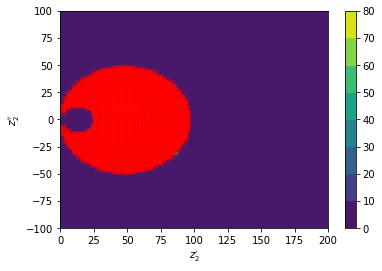

In [2]:
'''
USER INPUT
'''
ymin=0.1          # ksqr<ymin
num_x=1000        # resolution of x (number of points from 0 to Pi) 
num_z_re=100      # resolution of real part of z2
num_z_im=100      # resolution of imaginary part of z2
z_re_min=0      # real part of z belong [z_re_min, z_re_max]
z_re_max=200      # real part of z belong [z_re_min, z_re_max]
z_im_min=-100      # image part of z belong [z_im_min, z_im_max]
z_im_max=100      # image part of z belong [z_im_min, z_im_max]
z_re_log=False     # logarifm scale of real axis. if True - real part of z2 belong to [z_re_0+10^z_re_pow1, z_re_0+10^z_re_pow2]
z_im_log=False    # logarifm scale of image axis. if True - image part of z2 belong to [z_im_0+10^z_im_pow1, z_im_0+10^z_im_pow2]
z_re_pow1=-2       # set if z_re_log=True, else will be ignored
z_re_pow2=3      # set if z_re_log=True, else will be ignored
z_im_pow1=0       # set if z_im_log=True, else will be ignored
z_im_pow2=1       # set if z_im_log=True, else will be ignored
z_re_0=0          # set if z_re_log=True, else will be ignored; real part of z2 belong to [z_re_0+10^z_re_pow1, z_re_0+10^z_re_pow2]
z_im_0=-15        # set if z_im_log=True, else will be ignored; image part of z2 belong to [z_im_0+10^z_im_pow1, z_im_0+10^z_im_pow2]

plot_points=True
###
do()